Original Graph:
0 1 0 1 0 1 1 1 0 1 

1 1 0 0 0 1 0 0 1 0 

1 0 0 0 1 1 1 0 1 1 

1 1 1 1 0 0 1 0 0 0 

1 1 1 1 0 0 0 1 0 1 

1 0 0 1 0 1 1 0 0 0 

0 0 1 1 0 1 1 0 0 1 

1 1 0 1 0 1 0 0 1 0 

0 0 0 0 1 1 1 1 1 1 

0 0 0 1 1 1 1 1 0 0 




Labeled Graph:
  2   W   W W W   ) 

2 2       W     2   

2       W W W   2 2 

2 2 2 2     W       

2 2 2 2       O   2 

2     2   W W       

    2 2   W W     e 

f f   2   W     W   

        W W W W W W 

      W W W W W     

Max Cluster: W
Size: 26
Execution times of main routine given different n:
 [0.008506536483764648]


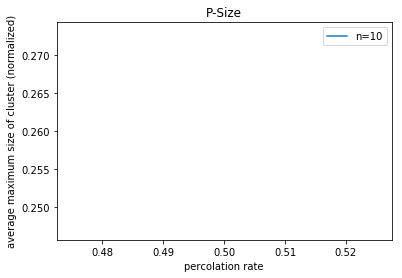

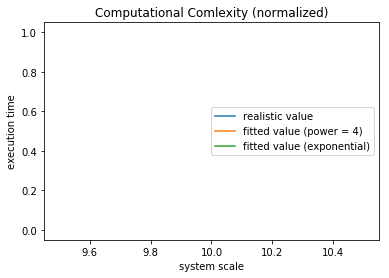

In [210]:
import time
from IPython.display import clear_output
import random
import numpy as np
from matplotlib import pyplot as plt

class UnionFindBase(object):
    def __init__(self, N,p):
        self.id = [None] * N
        self.occupied = [None]*N
        for i in range(N):
            self.id[i] = i
            if random.uniform(0,1)>=p:
                self.occupied[i] = 1
            else:
                self.occupied[i] = 0

class QuickUnion(UnionFindBase):
    def __init__(self, N,p):
        super(QuickUnion, self).__init__(N,p)

    def root(self, i):
        while i != self.id[i]:
            i = self.id[i]
        return i

    def find(self, p, q):
        return self.root(p) == self.root(q)

    def unite(self, p, q): #q:變成集合的root
        i = self.root(p)
        j = self.root(q)
        self.id[i] = j

def original_graph(ni,nj,graph):
    print('Original Graph:')
    for i in range(ni):
        for j in range(nj):
            node = nj*i+j
            print(graph[node],end=' ')
        print('\n')
    print('\n\n')

def labeled_graph(ni,nj,graph_class,plot=False):
    labels = []
    if plot:
        print('Labeled Graph:')
    for i in range(ni):
        for j in range(nj):
            if graph_class.occupied[nj*i+j]==1:
                if plot:
                    print(chr(32+graph_class.root(nj*i+j)),end=' ')
                label = chr(32+graph_class.root(nj*i+j))        
            else:
                if plot:
                    print(' ',end=' ')
                label = ' '
            labels.append(label)
        if plot:
            print('\n')
    return labels

    
def max_cluster(labels,isprint=False):
    max_cluster = None
    for l in list(set(labels)):
        if labels.count(l)>labels.count(max_cluster) and l != ' ':
            max_cluster = l      
    if isprint:
        print('Max Cluster:',max_cluster)
    size = labels.count(max_cluster)
    if isprint:
        print('Size:',size)
    return l,size

#core algorithm
def hoshenKopelman(ni,nj,qn):
    for i in range(ni):
        for j in range(nj):
            node = nj*i+j
            if qn.occupied[node]==1:
                left = nj*i+(j-1)%nj
                above = nj*((i-1)%ni)+j
                
                if qn.occupied[left] and not qn.occupied[above]:
                    qn.unite(node,left)

                if  qn.occupied[above] and not qn.occupied[left]:
                    qn.unite(node,above)

                if qn.occupied[above] and qn.occupied[left]:
                    if qn.find(left,above):
                        qn.unite(node,above)

                    elif qn.root(left)>qn.root(above):
                        qn.unite(left,above)
                        qn.unite(node,above)

                    elif qn.root(left)<qn.root(above):
                        qn.unite(above,left)
                        qn.unite(node,left)
    return qn
if __name__ == '__main__':

    
    #main routine
    ns= [10,20,30,40,50,60,70,80,90,100]
#     ns = [10]
    P= np.arange(0.0,1.0,0.05)
#     P = np.array([0.5])
    iteration = 30
#     iteration = 1
    Sizes = []
    execution_time = []
    for n in ns:
        Size = []
        start = time.time()
        for p in P: 
            mean_size = 0.0
            for t in range(iteration):
                ni,nj= n,n
                N = ni*nj
                qn = QuickUnion(N,p)
                original_graph(ni,nj,qn.occupied)
                qn = hoshenKopelman(ni,nj,qn)
                labels = labeled_graph(ni,nj,qn,plot=True)                     
                mcluster,size = max_cluster(labels,isprint=True)
                #print(mcluster,size)
                mean_size += size
            mean_size/= iteration
            mean_size/= N
            Size.append(mean_size)
        Size.reverse()
        Sizes.append(Size)
        end = time.time()
        t = end -start
        execution_time.append(t)
    print('Execution times of main routine given different n:\n',
          execution_time)
    
    #p-size relation
    dn = 0
    for Size in Sizes:
        nlabel='n='+str(10+dn)
        plt.plot(P,Size,label=nlabel)
        dn+=10
        
    plt.title('P-Size')
    plt.xlabel('percolation rate')
    plt.ylabel('average maximum size of cluster (normalized)')
    plt.legend()
    plt.savefig('p_size_relation_2.png')
    plt.show()
    
#t-n relation  
ns = np.array(ns)
plt.plot(ns,execution_time/np.max(execution_time),
         label = 'realistic value')
plt.plot(ns,np.power(ns,4)*0.00000001,
         label = 'fitted value (power = 4)')
plt.plot(ns,np.exp(ns**2/(100**2*np.log(4.2)))-1.0,
         label = 'fitted value (exponential)')
plt.title('Computational Comlexity (normalized)')
plt.xlabel('system scale')
plt.ylabel('execution time')
plt.legend()
plt.savefig('computational_complexity.png')
plt.show()